代码说明：

1、torch.nn.Conv2d(1,10,kernel_size=3,stride=2,bias=False)

      1是指输入的Channel，灰色图像是1维的；10是指输出的Channel，也可以说第一个卷积层需要10个卷积核；kernel_size=3,卷积核大小是3x3；stride=2进行卷积运算时的步长，默认为1；bias=False卷积运算是否需要偏置bias，默认为False。padding = 0，卷积操作是否补0。

2、self.fc = torch.nn.Linear(320, 10)，这个320获取的方式，可以通过x = x.view(batch_size, -1) # print(x.shape)可得到(64,320),64指的是batch，320就是指要进行全连接操作时，输入的特征维度。

In [58]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [26]:
# prepare dataset
batch_size = 64
# ((0.1307,), (0.3081,))为平均值，标准差
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
 
train_dataset = datasets.MNIST(root='../data/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../data/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [28]:
# design model using class
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5) # 1:灰度图片的通道，10：输出通道，5：卷积核（kernel）
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)
 
 
    def forward(self, x):
        # flatten data from (n,1,28,28) to (n, 784)
        
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        # print(x.size())
        # x = x.view(batch_size, -1) # -1 此处自动算出的是320
        x = torch.flatten(x, 1)
        # print("x.shape",x.shape)
        x = self.fc(x)
 
        return x

In [30]:
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("cuda")
model.to(device)
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

cuda


In [31]:
# training cycle forward, backward, update
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100*correct/total))
    return correct/total

[1,   300] loss: 1.539
[1,   600] loss: 0.483
[1,   900] loss: 0.333
accuracy on test set: 92 % 
[2,   300] loss: 0.260
[2,   600] loss: 0.230
[2,   900] loss: 0.216
accuracy on test set: 95 % 
[3,   300] loss: 0.180
[3,   600] loss: 0.160
[3,   900] loss: 0.162
accuracy on test set: 96 % 
[4,   300] loss: 0.138
[4,   600] loss: 0.138
[4,   900] loss: 0.125
accuracy on test set: 96 % 
[5,   300] loss: 0.113
[5,   600] loss: 0.116
[5,   900] loss: 0.109
accuracy on test set: 97 % 
[6,   300] loss: 0.106
[6,   600] loss: 0.097
[6,   900] loss: 0.095
accuracy on test set: 97 % 
[7,   300] loss: 0.091
[7,   600] loss: 0.089
[7,   900] loss: 0.084
accuracy on test set: 97 % 
[8,   300] loss: 0.086
[8,   600] loss: 0.077
[8,   900] loss: 0.078
accuracy on test set: 97 % 
[9,   300] loss: 0.070
[9,   600] loss: 0.079
[9,   900] loss: 0.073
accuracy on test set: 98 % 
[10,   300] loss: 0.068
[10,   600] loss: 0.070
[10,   900] loss: 0.070
accuracy on test set: 98 % 


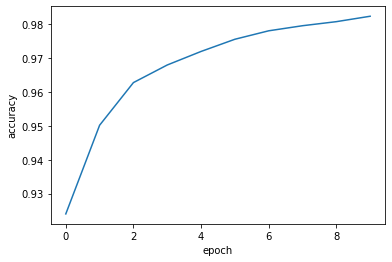

In [32]:
if __name__ == '__main__':
    epoch_list = []
    acc_list = []
    
    for epoch in range(10):
        train(epoch)
        acc = test()
        epoch_list.append(epoch)
        acc_list.append(acc)
    
    plt.plot(epoch_list,acc_list)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

尝试复杂点：

• Conv2d Layer *3

• ReLU Layer * 3

• MaxPooling Layer * 3

• Linear Layer * 3

In [51]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [52]:
# prepare dataset
batch_size = 64
# ((0.1307,), (0.3081,))为平均值，标准差
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
 
train_dataset = datasets.MNIST(root='../data/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../data/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [53]:
# design model using class
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, 5) # 1:灰度图片的通道，10：输出通道，5：卷积核（kernel）
        self.conv2 = torch.nn.Conv2d(10, 20, 5)
        self.conv3 = torch.nn.Conv2d(20, 20, 5, padding=2)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc1 = torch.nn.Linear(80, 10)
        # self.fc2 = torch.nn.Linear(20, 10)
        # self.fc3 = torch.nn.Linear(80, 10)
 
 
    def forward(self, x):
        # flatten data from (n,1,28,28) to (n, 784)
        
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = F.relu(self.pooling(self.conv3(x)))
        
        # print(x.size())
        
        # x = x.view(batch_size, -1)
        x = torch.flatten(x, 1)

        # print(x.shape)
        
        x = self.fc1(x)
        # x = self.fc2(x)
        # x = self.fc3(x)
 
        return x

In [54]:
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("cuda")
model.to(device)
 
# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

cuda


In [55]:
# training cycle forward, backward, update
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
 
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0
 
 
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100*correct/total))
    return correct/total

[1,   300] loss: 1.549
[1,   600] loss: 0.428
[1,   900] loss: 0.294
accuracy on test set: 92 % 
[2,   300] loss: 0.242
[2,   600] loss: 0.200
[2,   900] loss: 0.188
accuracy on test set: 95 % 
[3,   300] loss: 0.165
[3,   600] loss: 0.148
[3,   900] loss: 0.143
accuracy on test set: 95 % 
[4,   300] loss: 0.123
[4,   600] loss: 0.122
[4,   900] loss: 0.122
accuracy on test set: 96 % 
[5,   300] loss: 0.107
[5,   600] loss: 0.104
[5,   900] loss: 0.102
accuracy on test set: 97 % 
[6,   300] loss: 0.091
[6,   600] loss: 0.095
[6,   900] loss: 0.089
accuracy on test set: 97 % 
[7,   300] loss: 0.084
[7,   600] loss: 0.081
[7,   900] loss: 0.080
accuracy on test set: 97 % 
[8,   300] loss: 0.075
[8,   600] loss: 0.076
[8,   900] loss: 0.073
accuracy on test set: 98 % 
[9,   300] loss: 0.071
[9,   600] loss: 0.070
[9,   900] loss: 0.064
accuracy on test set: 98 % 
[10,   300] loss: 0.069
[10,   600] loss: 0.062
[10,   900] loss: 0.063
accuracy on test set: 98 % 


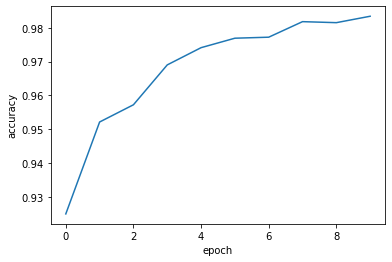

In [56]:
if __name__ == '__main__':
    epoch_list = []
    acc_list = []
    
    for epoch in range(10):
        train(epoch)
        acc = test()
        epoch_list.append(epoch)
        acc_list.append(acc)
    
    plt.plot(epoch_list,acc_list)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()